# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

- Siendo Arquitecto doy por sentado que principalmente lo mas importante para determinar el precio de una propedad son las denominadas 3 L: "Location", Location" y Location". Ironicamente la frase hace referencia a que si bien el inmueble puede tener las mil y un caractetisticas sobresalientes, el precio y su valor se da principalmente por donde esta emplazado, ya sea por cercania a algun lugar/transportes, orintacion respecto al asoleamiento, etc. Luego como motivo de estudio existen las relaciones entre los m2, cantidad de ambientes y baños, estado de la propiedad y un sin fin de etc que varian de acuerdo al tipo de propiedad. 


### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

## 2- Analisis exploratorio de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

In [2]:
# Antes de hacer la entrega en Jupyter como se indica en el Proyecto, trabaje desde Google Colab y montaba el dataset desde Drive ya que me resultaba mas 
# comodo ese entorno y su ayuda en linea.

#from google.colab import drive
#drive.mount('/content/drive')

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
# Monto el Dataset que tengo descargado en mi enviroment.

web = ('C:/Users/Tomas/Datascience/Proyecto DS 1 - TA/DS_Proyecto_01_Datos_Properati.csv')

#'/content/drive/My Drive/ACAMICA/Datasets/DS_Proyecto_01_Datos_Properati.csv' 
 
data = pd.read_csv(web)

print(data.shape)

data.head()

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
print('Nan values por columna')
print("")
print(data.isnull().sum())

Nan values por columna

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [6]:
data[data.isnull().any(axis=1)]  #muestro los NAN

# data.isna()
# data.dropna()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
17,2019-10-17,2019-10-22,2019-10-17,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,1.0,53.0,42.0,145000.0,USD,Qbay Golf 1 dormitorio vista al agua (180418),EN VENTA CON RENTA!!! Ideal Inversionista Estu...,Departamento,Venta
26,2019-10-17,9999-12-31,2019-10-17,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Oeste,Morón,2.0,1.0,1.0,45.0,45.0,110000.0,USD,VENTA DEPARTAMENTO EN CIUDAD JARDIN,Venta departamento de 2 ambientes en excelente...,Departamento,Venta
35,2019-10-17,2019-12-23,2019-10-17,NaN,NaN,Argentina,Capital Federal,Palermo,2.0,1.0,2.0,81.0,76.0,410000.0,USD,Nuevo Ingreso Palacio Bellini Alquiler,Excelente departamento de dos ambientes de 81m...,Departamento,Venta
36,2019-10-17,2019-10-27,2019-10-17,NaN,NaN,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,42.0,38.0,169000.0,USD,Precioso Departamento con cochera Zona univer...,Excelente ubicación a una cuadra y media de av...,Departamento,Venta
46,2019-10-17,2019-10-31,2019-10-17,NaN,NaN,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,52.0,46.0,159500.0,USD,Departamento de 2 ambientes en Venta en Palerm...,2 Amplios y hermosos ambientes ambientes -C...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146571,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,2.0,57.0,46.0,120000.0,USD,VENTA - DEPARTAMENTO 2 AMBIENTES - CONTRAFRENT...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta
146575,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,2.0,64.0,56.0,141000.0,USD,VENTA - DEPARTAMENTO 2 AMBIENTES TIPO DUPLEX- ...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta
146577,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,USD,VENTA - DEPARTAMENTO 3 AMBIENTES AL RÍO - JARD...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta
146578,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,USD,VENTA - DEPARTAMENTO 3 AMBIENTES AL RÍO - JARD...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta


- Observo que la mayoria de los **NaN** se encuentra en columnas lat (latitud) y lon (longitud) que hacen referencia a ubicacion geografica, asi como tambien en bathrooms, surface_total y surface_covered.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [7]:
# Uso la funcion nunique() de Pandas para contabilizar la cantidad de tipo de propiedad

print(data.property_type.nunique())

# Uso .value_counts() para contabiizar cuantas propiedades hay de cada tipo

print(data.property_type.value_counts())

10
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

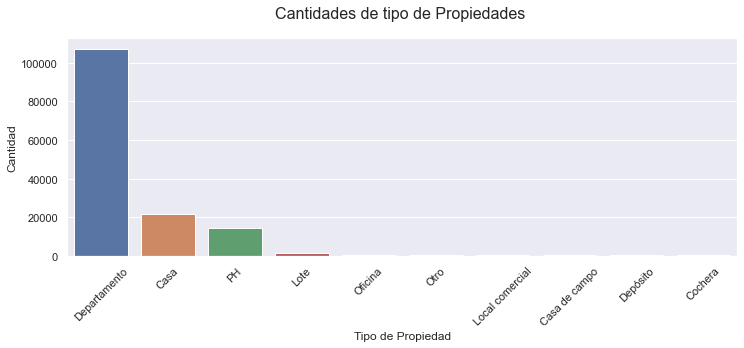

In [8]:
# usar un categorical plot para el tipo de propiedad

data.iloc[:,17]

plt.figure(figsize=(12,4))

plt.title('Cantidades de tipo de Propiedades ', weight=10, size = 16, pad = 20)

sns.countplot(data = data, x = "property_type",order = data['property_type'].value_counts().index) 
#plt.yscale("log")  # intente el uso este escalado para mejor visualizacion pero confunde mas la escala y

plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.xticks(rotation = 45)


- Las propiedades con mayor cantidad de unidaes son Departamentos, Casas y PH (Propiedad Horizontal)

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

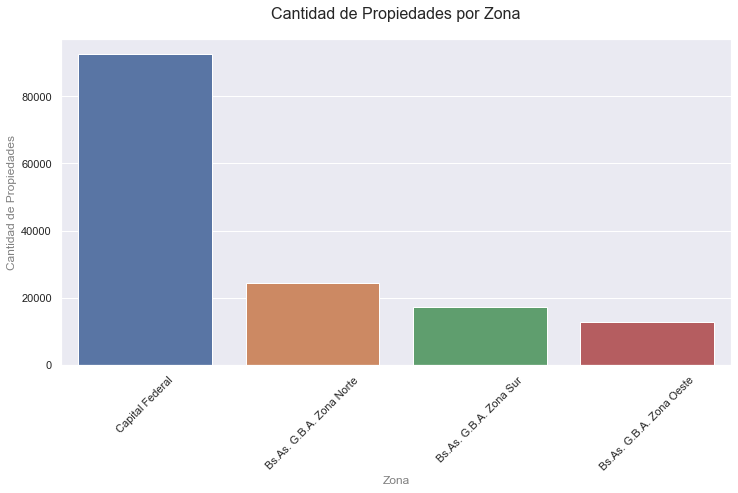

In [9]:
# Grafico las variables l2 y l3

#plt.subplot(1,2,1)

plt.figure(figsize=(12,6))
sns.countplot(data = data, x = "l2",order = data['l2'].value_counts().index) #

plt.title('Cantidad de Propiedades por Zona', weight=10, size = 16, pad = 20)
plt.xlabel('Zona', color='gray')
plt.ylabel('Cantidad de Propiedades', color='gray')
plt.xticks(rotation = 45)



Text(0, 0.5, 'Cantidad de Propiedades')

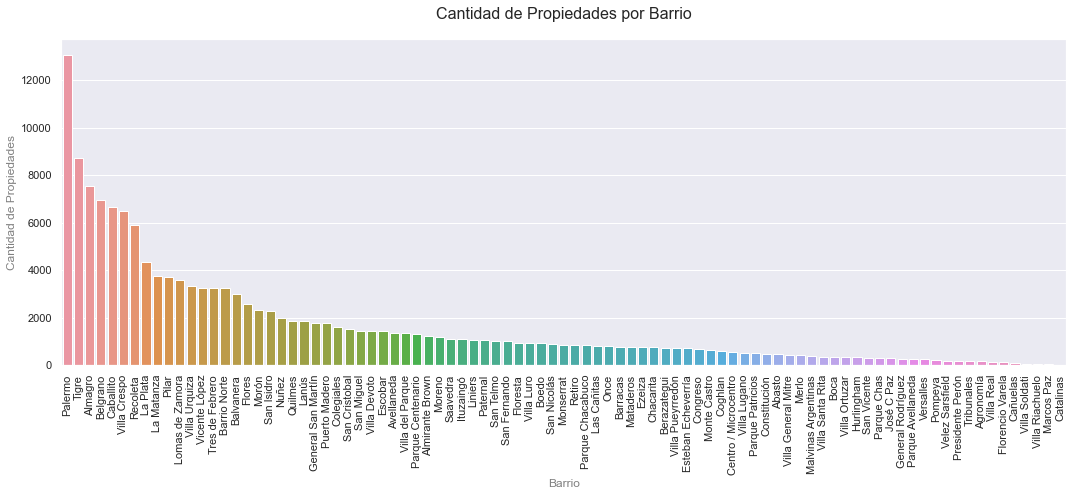

In [10]:
#plt.subplot(1,2,2)

plt.figure(figsize=(18,6))

plt.title('Cantidad de Propiedades por Barrio', weight=10, size = 16, pad = 20)
sns.countplot(data = data, x = "l3",order = data['l3'].value_counts().index)

plt.xlabel('Barrio', color='gray')
plt.xticks(rotation = 90)
plt.ylabel('Cantidad de Propiedades', color='gray')


- Preferi no realizar un subplot porque las escalas difieren, un grafico posee dimensiones mas grandes al otro.

- El primer grafico muestra las cuatro Zonas presentes en el Dataset y la cantidad de propiedades en cada uno. Capital Federal es la que mas propiedades tiene.
- El segundo grafico muestra la cantidad de propiedades por barrio en las 4 zonas.


5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [11]:
# Filtrar solo Capital Federal y Tipos de Prop: Depto, Casa y PH

mask_cf = (data.property_type.isin(['Departamento','PH','Casa'])) & (data.l2 == 'Capital Federal')

df_cf = data[mask_cf]
df_cf.shape

(91485, 19)

In [12]:
# Confirmo que el tamaño del nuevo dataframe es el correcto

data.loc[(data.l2 == 'Capital Federal') & (data.property_type.isin(['Departamento','PH','Casa']))].shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

- Desde la logica las mejores variables para predecir el precio de una propiedad son la relacion entre la superficie total (sup_total) (variable continua) y la cantidad de ambientes (rooms) (variable discreta). De igual modo a continuacion analizare las relaciones entre las distintas variables del Dataset.

In [13]:
# Uso corr() para obtener una primera aproximacion de las correlacciones de todas las variables. 

df_cf.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.063281,0.002065,-0.009273,0.097078,-0.002239,0.000296,0.171693
lon,-0.063281,1.000000,0.059762,0.045443,0.079655,0.000084,0.006052,0.156230
rooms,0.002065,0.059762,1.000000,0.927300,0.603174,0.064774,0.066757,0.448318
bedrooms,-0.009273,0.045443,0.927300,1.000000,0.603968,0.064468,0.066174,0.413555
bathrooms,0.097078,0.079655,0.603174,0.603968,1.000000,0.056524,0.058192,0.587724
surface_total,-0.002239,0.000084,0.064774,0.064468,0.056524,1.000000,0.770742,0.049071
surface_covered,0.000296,0.006052,0.066757,0.066174,0.058192,0.770742,1.000000,0.054534
price,0.171693,0.156230,0.448318,0.413555,0.587724,0.049071,0.054534,1.000000


- Como primera impresion se observan correlacciones entre ambientes y cuartos, baños y precio y entre superficie total y cubierta.

- Como .corr() por defecto usa por defecto el metodo Pearson y este sirve mayormente para relaciones lineales, las correlaciones que nos muestra son poco relevantes. A continuacion cambiare el metodo por Spearman y otro para Kendall para mostrar relaciones multiples.

In [14]:
df_cf.corr(method = 'spearman').style.background_gradient(cmap='coolwarm')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.118381,0.019788,0.011542,0.109149,0.039536,0.036418,0.303949
lon,-0.118381,1.000000,0.051870,0.046021,0.055002,0.042479,0.091937,0.079172
rooms,0.019788,0.051870,1.000000,0.966571,0.626570,0.838638,0.867520,0.708806
bedrooms,0.011542,0.046021,0.966571,1.000000,0.621037,0.818636,0.848947,0.689359
bathrooms,0.109149,0.055002,0.626570,0.621037,1.000000,0.685693,0.700590,0.700204
surface_total,0.039536,0.042479,0.838638,0.818636,0.685693,1.000000,0.957517,0.835156
surface_covered,0.036418,0.091937,0.867520,0.848947,0.700590,0.957517,1.000000,0.836027
price,0.303949,0.079172,0.708806,0.689359,0.700204,0.835156,0.836027,1.000000


In [15]:
df_cf.corr(method = 'kendall').style.background_gradient(cmap='coolwarm')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.094091,0.014672,0.008757,0.085799,0.026725,0.024501,0.206434
lon,-0.094091,1.000000,0.038862,0.034829,0.043147,0.028725,0.062195,0.054543
rooms,0.014672,0.038862,1.000000,0.936501,0.556917,0.704791,0.740235,0.565001
bedrooms,0.008757,0.034829,0.936501,1.000000,0.562537,0.683651,0.716835,0.551306
bathrooms,0.085799,0.043147,0.556917,0.562537,1.000000,0.563104,0.577346,0.573420
surface_total,0.026725,0.028725,0.704791,0.683651,0.563104,1.000000,0.860725,0.651813
surface_covered,0.024501,0.062195,0.740235,0.716835,0.577346,0.860725,1.000000,0.653039
price,0.206434,0.054543,0.565001,0.551306,0.573420,0.651813,0.653039,1.000000


- Observamos que las correlaciones mediante estos dos metodos se ajusta mejor a la realidad con una fuerte tendencia en la relacion entre el precio y la superficie, que en cierta medida, es lo correcto.

A continuacion comienzo con el estudio de las relaciones entre variables.

Text(0, 0.5, 'Rango de recio')

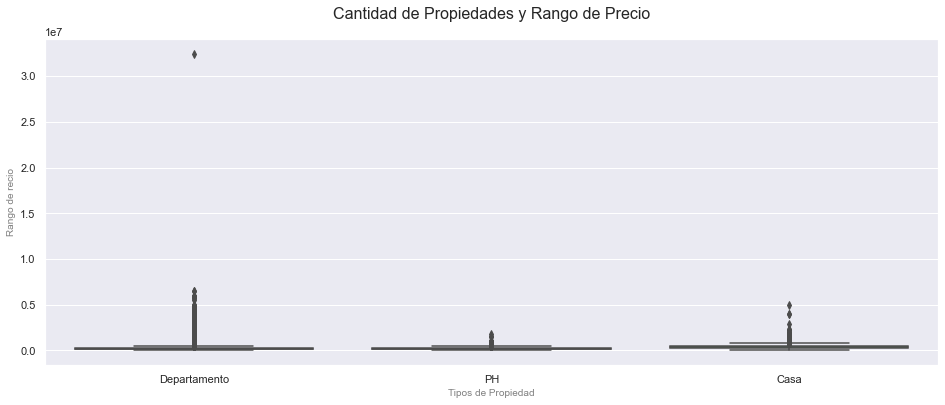

In [16]:
plt.figure(figsize=(16,6))

sns.boxplot(data = df_cf, x = 'property_type', y = "price")

plt.title('Cantidad de Propiedades y Rango de Precio', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Rango de recio', size = 10, color='gray')


- Se observa que el rango de precios de los tres tipos de propiedades pricipales oscila entre 0 y 500 mil Usd, con Outliers de mas de 3 millones que a su vez no dejan visualizar bien el grafico. Mas adelante trabajare sobre esos casos haciendo el filtrado correspondiente.

Text(0, 0.5, 'Superficie Total $m^{2}$')

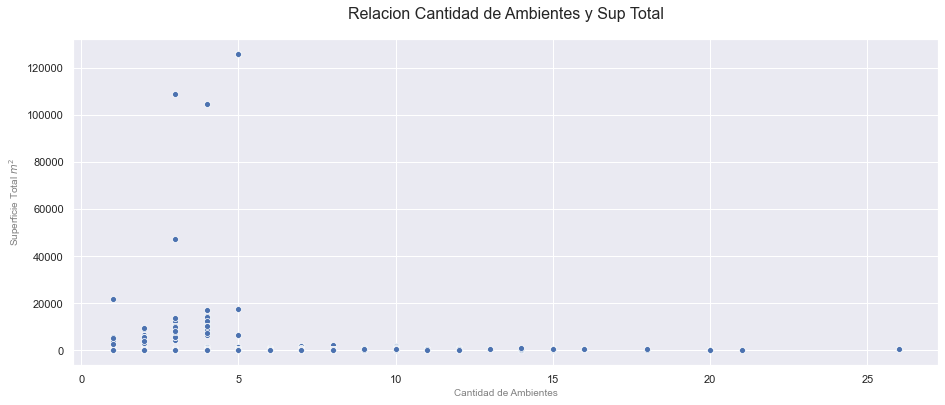

In [17]:
# Relacion entre Cant de Ambientes y Sup Total

plt.figure(figsize=(15.5,6))
sns.scatterplot(x="rooms", y="surface_total", data = df_cf)
plt.title('Relacion Cantidad de Ambientes y Sup Total', weight=10, size = 16, pad = 20)
plt.xlabel('Cantidad de Ambientes', size = 10, color='gray')
plt.ylabel('Superficie Total $m^{2}$', size = 10, color='gray')

- Segun el grafico anterior se interpreta que la mayoria tiene **entre 0 y 5 ambientes** y **entre 0 y 200 m2** de superficie total. Tambien mas adelante trabajer con filtros para ver y sacar o no los Outliers, depende de que se tratan.

In [18]:
df_cf.shape

(91485, 19)

In [19]:
# Filtro a ver si existen Superficies cubiertas mayores a superficies totales.

mask_surface = df_cf['surface_covered'] <= df_cf['surface_total']
mask_surface.shape
df_cf = df_cf[mask_surface]
df_cf.shape

(81291, 19)

- Corroboro que SI existian, las cuales es mejor descartarlas ya que es un error grosero que puede viciar el Modelo.

Text(0, 0.5, 'Superficie Total $m^{2}$')

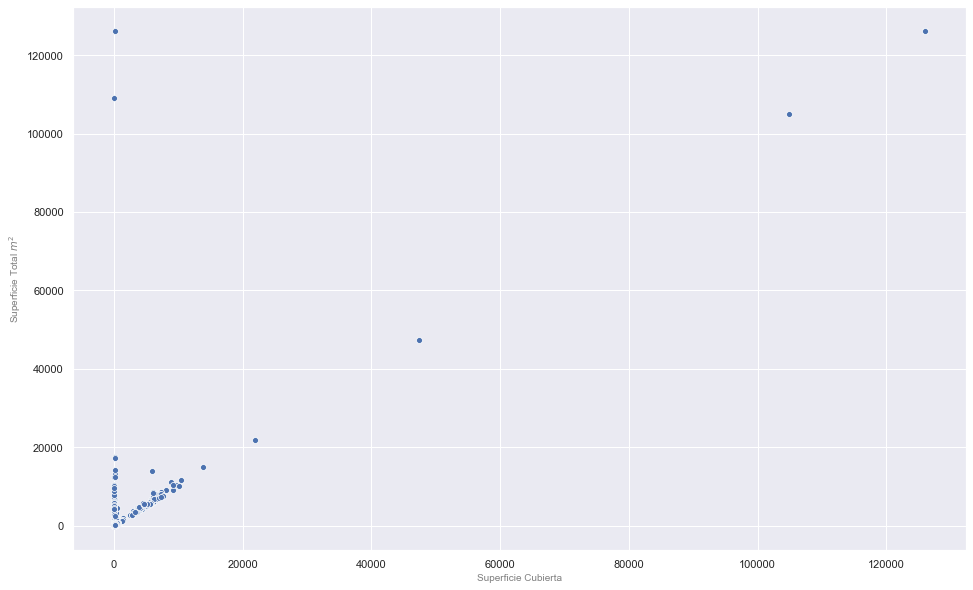

In [20]:
# Estudio la relacion entre Sup cubierta y Sup Total

plt.figure(figsize=(16,10))

sns.scatterplot(x="surface_covered", y="surface_total", data = df_cf)
plt.xlabel('Superficie Cubierta', size = 10, color='gray')
plt.ylabel('Superficie Total $m^{2}$', size = 10, color='gray')

- Se observan Outliers que poseen una superficie mayor a 20000 m2, que pueden llegar a ser un error


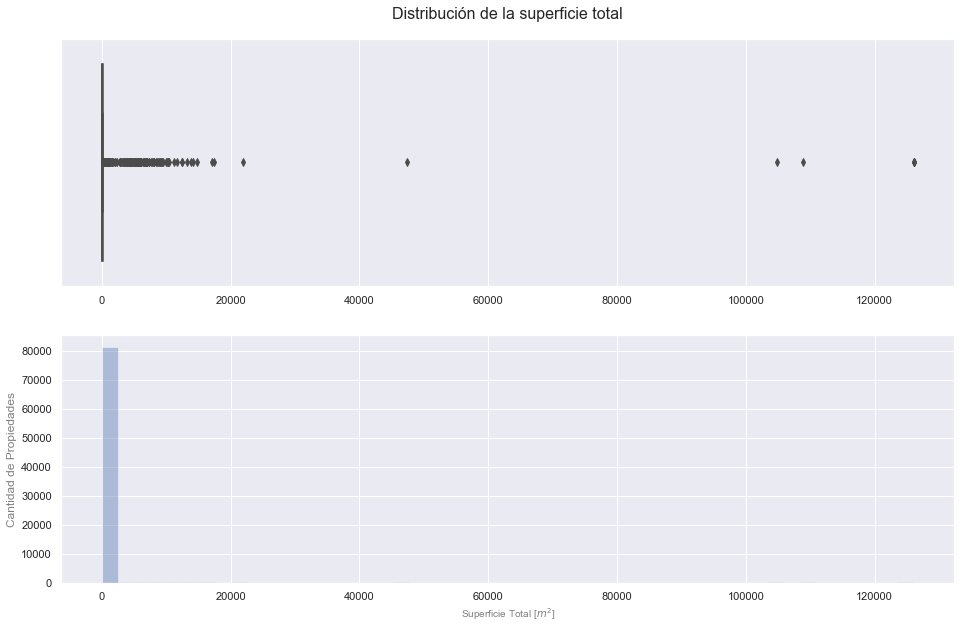

In [21]:
# Genero un Boxplot y un Displot para vizualizar los Outliers.

plt.figure(figsize = (16,10))

plt.subplot(2,1,1)
sns.boxplot(df_cf['surface_total'])
plt.xlabel("")
plt.title('Distribución de la superficie total', weight=10, size = 16, pad = 20)

plt.subplot(2,1,2)
sns.distplot(df_cf['surface_total'], kde = False)
plt.xlabel('Superficie Total [$m^{2}$]', size = 10, color='gray')
plt.ylabel('Cantidad de Propiedades', color='gray')
plt.show()

- A continuacion tratare de determinar de que se tratan los **Outliers** anteriormente mencionados.

In [22]:
# A continuacion filtro las superficies mayores a 5000 m2

mask_st = df_cf.loc[df_cf['surface_total'] > 5000,['surface_total','surface_covered','rooms','title','property_type']] 
mask_st.head()

,surface_total,surface_covered,rooms,title,property_type
583,5119.0,4685.0,2.0,Departamento 2 Ambientes Amplio - Almagro Norte,Departamento
996,6845.0,5930.0,4.0,PALERMO Departamento 4 Amb. APTO PROFESIONAL,Departamento
1229,12521.0,53.0,3.0,VENTA. BELGRANO 3 AMB. 2 PATIOS.,Departamento
1277,6512.0,5780.0,4.0,VENTA 4 AMBIENTES BALCON SUBTE PARQUE PATRICIOS,Departamento
3125,13250.0,194.0,4.0,VENTA LOTE 135m2- CASA 5 amb. 220m2. FLORES,Casa


- Algunas superficies claramente muestran algun tipo de error. Las Casas SI pueden tener esas relaciones. En el desafio profundizare.

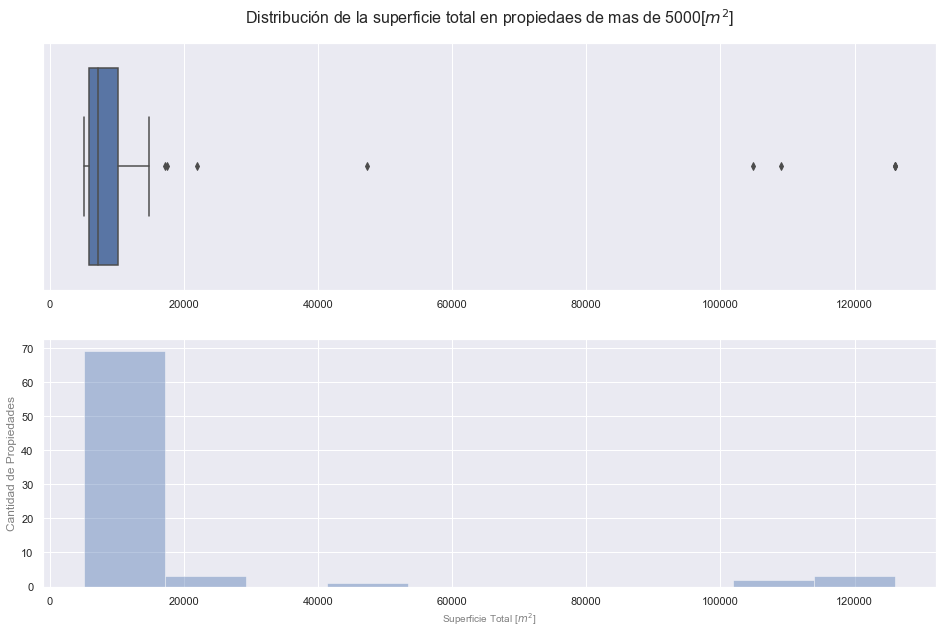

In [23]:
plt.figure(figsize = (16,10))

plt.subplot(2,1,1)
sns.boxplot(mask_st['surface_total'])
plt.xlabel("")
plt.title('Distribución de la superficie total en propiedaes de mas de 5000[$m^{2}$]', weight=10, size = 16, pad = 20)

plt.subplot(2,1,2)
sns.distplot(mask_st['surface_total'],bins=10, kde = False)
plt.xlabel('Superficie Total [$m^{2}$]', size = 10, color='gray')
plt.ylabel('Cantidad de Propiedades', color='gray')
plt.show()

- Existen alrededor de 70 propiedades que presentan mas de 5000m2 de superficie total (terreno).

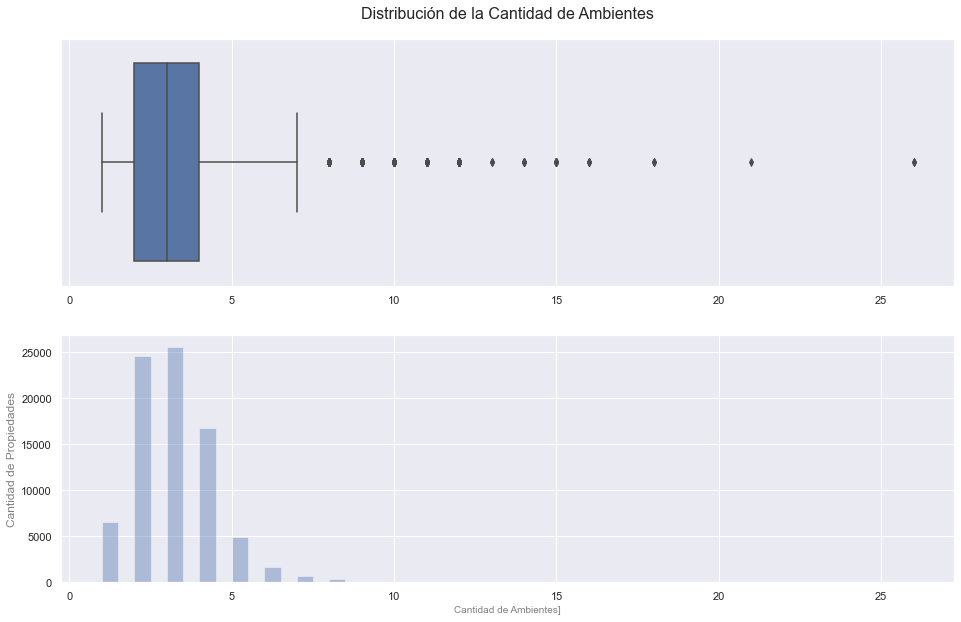

In [24]:
# A continuacion graficare la distribucion de la Cantidad de Ambientes.

plt.figure(figsize = (16,10))

plt.subplot(2,1,1)
sns.boxplot(df_cf['rooms'])
plt.xlabel("")
plt.title('Distribución de la Cantidad de Ambientes', weight=10, size = 16, pad = 20)

plt.subplot(2,1,2)
sns.distplot(df_cf['rooms'], kde = False)
plt.xlabel('Cantidad de Ambientes]', size = 10, color='gray')
plt.ylabel('Cantidad de Propiedades', color='gray')
plt.show()


- Se Observa que hay propiedades con mas de 15 ambientes, que es algo irregular. A continuacion tambien los voy a filtrar. Profundizare en las propiedades con mas de 10 ambientes y las menores a 25 m2, denominados (micro-ambientes) para ver de que se trata.

In [25]:
# A continuacion filtro las propiedades con mas de 15 ambientes

df_cf.loc[df_cf['rooms'] > 15,['surface_total','surface_covered','rooms','title','property_type','price']] 

,surface_total,surface_covered,rooms,title,property_type,price
31583,845.0,835.0,26.0,CASA CON LOTE LA BOCA VENTA OPORTUNIDAD,Casa,750000.0
34580,476.0,297.0,16.0,PH BELGRANO A RECICLAR OPORTUNIDAD !!!,PH,500000.0
42577,53.0,45.0,21.0,Depto 2 ambientes Excelente Ubicación!,Departamento,135000.0
44167,476.0,297.0,16.0,PH BELGRANO A RECICLAR OPORTUNIDAD !!!,PH,500000.0
69101,476.0,297.0,16.0,PH BELGRANO A RECICLAR OPORTUNIDAD !!!,PH,500000.0
79655,275.0,275.0,18.0,"Casa a Reciclar o terreno,1/2 de Av Cabildo 12...",Casa,700000.0
111651,845.0,835.0,26.0,CASA CON LOTE LA BOCA VENTA OPORTUNIDAD,Casa,750000.0
127955,575.0,552.0,18.0,VENTA CONVENTILLO BOCA CABA,Casa,180000.0


- Observo que se trata de Propiedades grandes de tipo 'Oportunidad' para proyectos Inmobiliarios.

In [26]:
# A continuacion filtro las propiedades con menos de 25m2

df_cf.loc[df_cf['surface_total'] < 25,['surface_total','surface_covered','rooms','title','property_type', 'price']] 

,surface_total,surface_covered,rooms,title,property_type,price
21,22.0,22.0,1.0,Monoambiente Vista Abierta,Departamento,48000.0
57,24.0,24.0,1.0,Gascón 1500 Palermo 1amb U$85.000 Apto Prof,Departamento,85000.0
351,23.0,23.0,1.0,VENTA MONOAMBIENTE CONGRESO EXCELENTE ESTADO,Departamento,72000.0
358,23.0,23.0,1.0,DEPARTAMENTO MONOAMBIENTE APTO PROFESIONAL!!!,Departamento,62000.0
360,14.0,14.0,1.0,"EXCELENTE COCHERA, EXCELENTE INVERSION !",Departamento,27000.0
...,...,...,...,...,...,...
135264,24.0,24.0,1.0,Recoleta - 1 ambiente 24m2 - Pueyrredon 1400,Departamento,85000.0
135268,24.0,24.0,1.0,Pueyrredón 1300 Recoleta 1amb Ap/prof uS85000,Departamento,85000.0
135269,24.0,24.0,1.0,BARRIO NORTE MONOAMBIENTE,Departamento,85000.0
135270,24.0,24.0,1.0,Excelente departamento en pleno centro de Buen...,Departamento,80000.0


- Observo que se tratan de Monoambientes y Cocheras aunque el property_type diga 'Departamento'. Por lo tanto el Dataset se podria seguir acotando a lo que se necesita

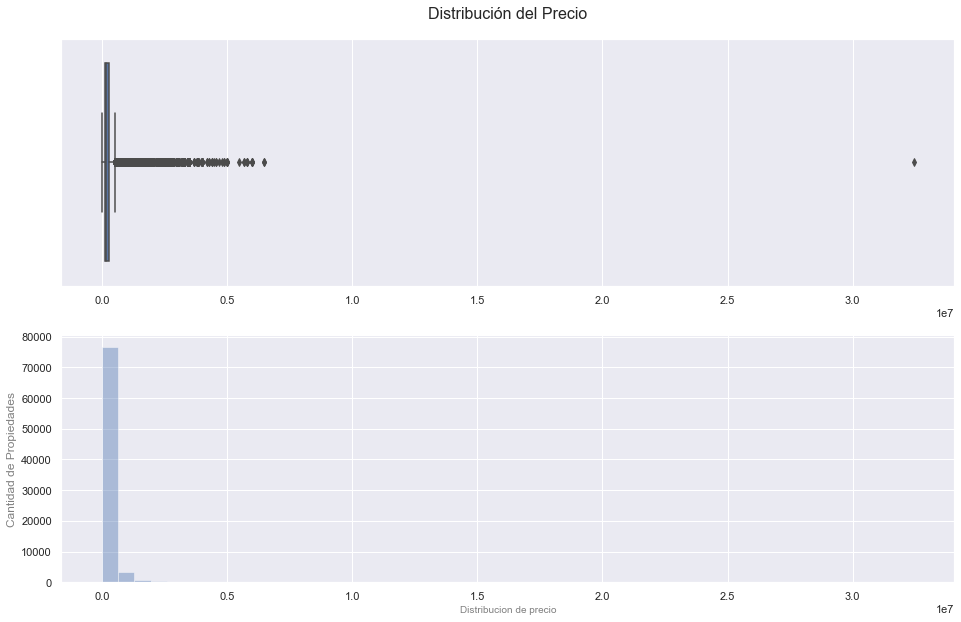

In [27]:
# Distribucion de los precios

plt.figure(figsize = (16,10))

plt.subplot(2,1,1)
sns.boxplot(df_cf['price'])
plt.xlabel("")
plt.title('Distribución del Precio', weight=10, size = 16, pad = 20)

plt.subplot(2,1,2)
sns.distplot(df_cf['price'], kde = False)
plt.xlabel('Distribucion de precio', size = 10, color='gray')
plt.ylabel('Cantidad de Propiedades', color='gray')
plt.show()

- Se interpreta que la mayoria de los valores en el dataset se encuentra entre 0 y 1 millon, con outliers de mas de 3 millones

In [28]:
# Filtro propiedades de mas de 5 millones

df_cf.loc[df_cf['price'] > 5000000,['surface_total','surface_covered','rooms','title','property_type', 'price']] 


,surface_total,surface_covered,rooms,title,property_type,price
5130,600.0,600.0,6.0,VENTA RECOLETA,Departamento,6000000.0
31041,677.0,568.0,8.0,Edificio emblemático y premiado. Único en su e...,Departamento,5800000.0
35814,600.0,600.0,6.0,VENTA RECOLETA,Departamento,6000000.0
39490,516.0,456.0,8.0,VENTA BELGRANO,Departamento,5500000.0
39938,600.0,600.0,6.0,VENTA RECOLETA,Departamento,6000000.0
48077,978.0,489.0,10.0,Departamento estilo francés en Recoleta en VENTA,Departamento,5700000.0
76894,43.0,43.0,1.0,Venta Departamento en Palermo Capital Federal ...,Departamento,32434232.0
82093,600.0,600.0,4.0,Posadas 1600 - Recoleta - Capital Federal,Departamento,5800000.0
94655,771.0,611.0,5.0,EYLE PETRONA 300,Departamento,6500000.0
97166,771.0,611.0,5.0,EYLE PETRONA 300,Departamento,6500000.0


- Se trata de 13 Propiedades de alto valor 

Text(0, 0.5, 'Precio de Propiedad')

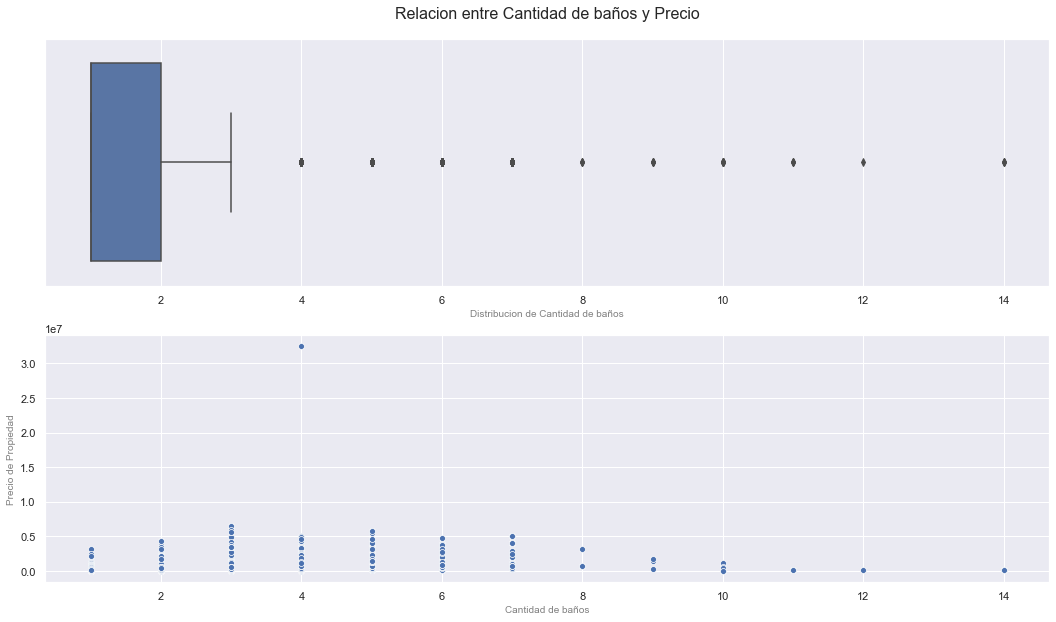

In [29]:
# Exploro la relacion entre Cantidad de baños y Precio que tiene una correlacion fuerte

plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Relacion entre Cantidad de baños y Precio', weight=10, size = 16, pad = 20)
sns.boxplot(df_cf['bathrooms'])
plt.xlabel('Distribucion de Cantidad de baños', size = 10, color='gray')

plt.subplot(2,1,2)
sns.scatterplot(data = df_cf, x="bathrooms", y="price")
plt.xlabel('Cantidad de baños', size = 10, color='gray')
plt.ylabel('Precio de Propiedad', size = 10, color='gray')


- Se ve que la gran mayoria de propiedades tiene entre 1 y 3 baños y existen Outliers de hasta 14 baños que merecen ver de que se trata ya que pueden llegar a ser un error.

In [30]:
# Genero una mascara que deje afuera los datos que no sirven
 
mask_sin_outliers = df_cf.loc[df_cf['rooms'] < 10,['surface_total','surface_covered','rooms','title','property_type','price']] 
mask_sin_outliers = mask_sin_outliers.loc[df_cf['surface_total'] < 5000,['surface_total','surface_covered','rooms','title','property_type','price']]
mask_sin_outliers = mask_sin_outliers.loc[df_cf['surface_covered'] < 500,['surface_total','surface_covered','rooms','title','property_type','price']]  
mask_sin_outliers = mask_sin_outliers.loc[df_cf['price'] < 3000000,['surface_total','surface_covered','rooms','title','property_type','price']] 
mask_sin_outliers = mask_sin_outliers.loc[df_cf['rooms'] < 10,['surface_total','surface_covered','rooms','title','property_type','price']] 

mask_sin_outliers.corr()

,surface_total,surface_covered,rooms,price
surface_total,1.000000,0.690972,0.540729,0.509809
surface_covered,0.690972,1.000000,0.774739,0.766044
rooms,0.540729,0.774739,1.000000,0.518832
price,0.509809,0.766044,0.518832,1.000000


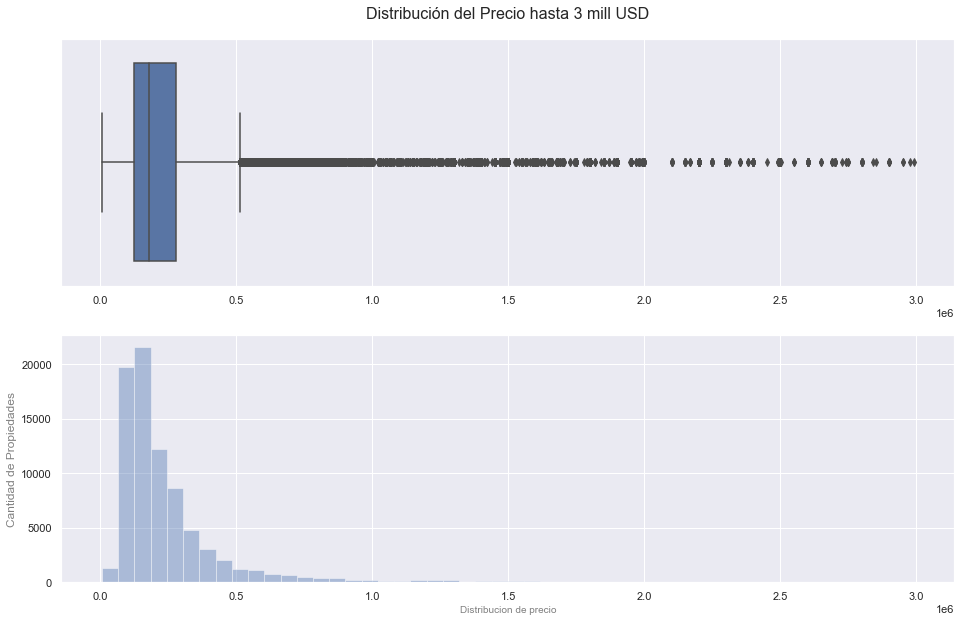

In [31]:
# Nueva distribucion de los precios hasta 3 millones

plt.figure(figsize = (16,10))

plt.subplot(2,1,1)
sns.boxplot(mask_sin_outliers['price'])
plt.xlabel("")
plt.title('Distribución del Precio hasta 3 mill USD', weight=10, size = 16, pad = 20)

plt.subplot(2,1,2)
sns.distplot(mask_sin_outliers['price'], kde = False)
plt.xlabel('Distribucion de precio', size = 10, color='gray')
plt.ylabel('Cantidad de Propiedades', color='gray')
plt.show()

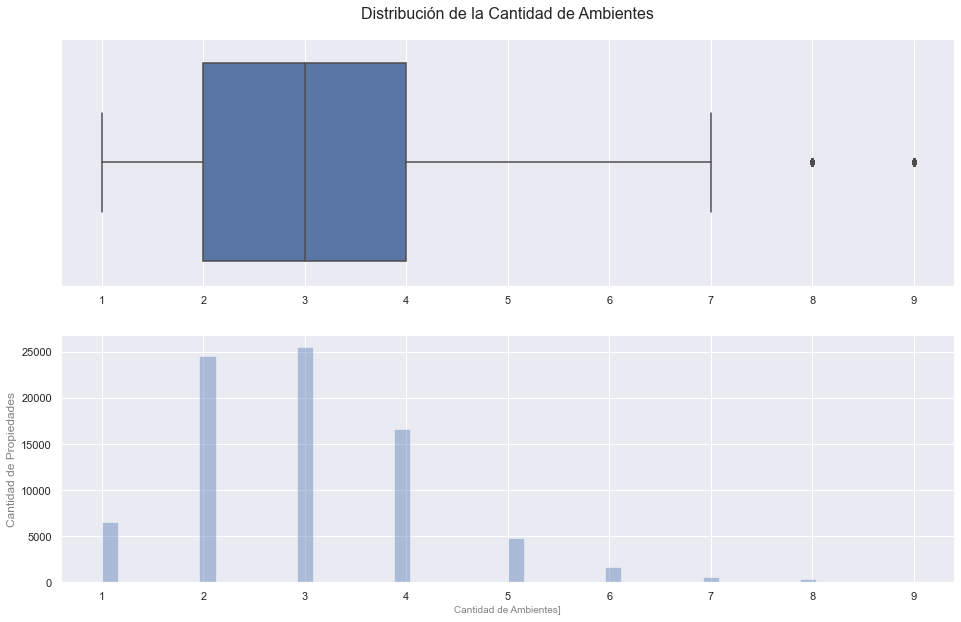

In [32]:
# Nueva ddistribucion de la Cantidad de Ambientes

plt.figure(figsize = (16,10))

plt.subplot(2,1,1)
sns.boxplot(mask_sin_outliers['rooms'])
plt.xlabel("")
plt.title('Distribución de la Cantidad de Ambientes', weight=10, size = 16, pad = 20)

plt.subplot(2,1,2)
sns.distplot(mask_sin_outliers['rooms'], kde = False)
plt.xlabel('Cantidad de Ambientes]', size = 10, color='gray')
plt.ylabel('Cantidad de Propiedades', color='gray')
plt.show()


Text(0, 0.5, 'Superficie Cubierta $m^{2}$')

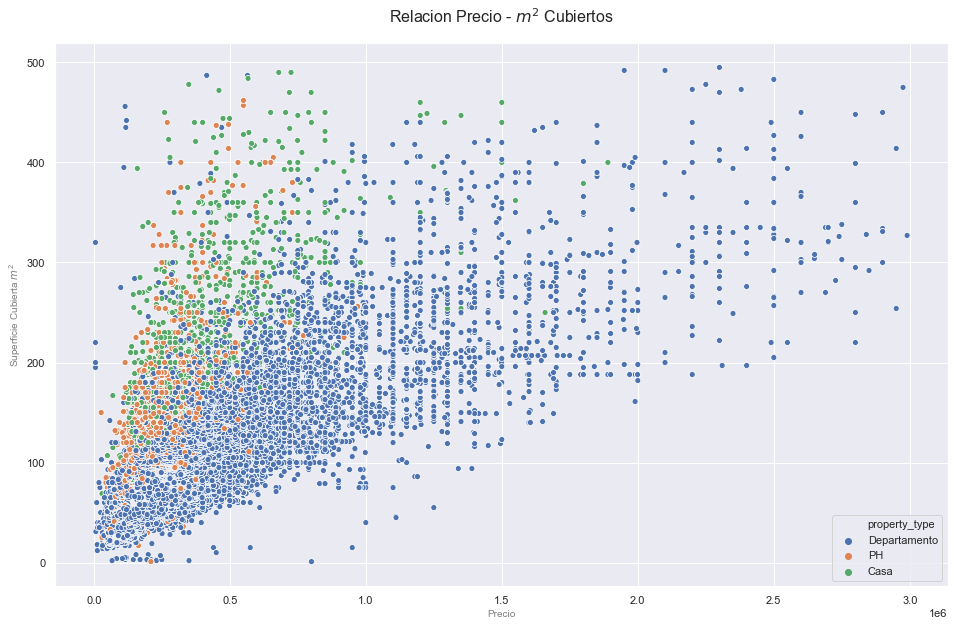

In [33]:
# Genero un Scatter mas preciso entre la relacion del Precio y los mts2 Cubiertos

plt.figure(figsize=(16,10))
plt.title('Relacion Precio - $m^{2}$ Cubiertos ', weight=10, size = 16, pad = 20)

sns.scatterplot(x="price", y="surface_covered", data = mask_sin_outliers, hue = 'property_type')
plt.xlabel('Precio', size = 10, color='gray')
plt.ylabel('Superficie Cubierta $m^{2}$', size = 10, color='gray')

Text(0, 0.5, 'Rango de recio')

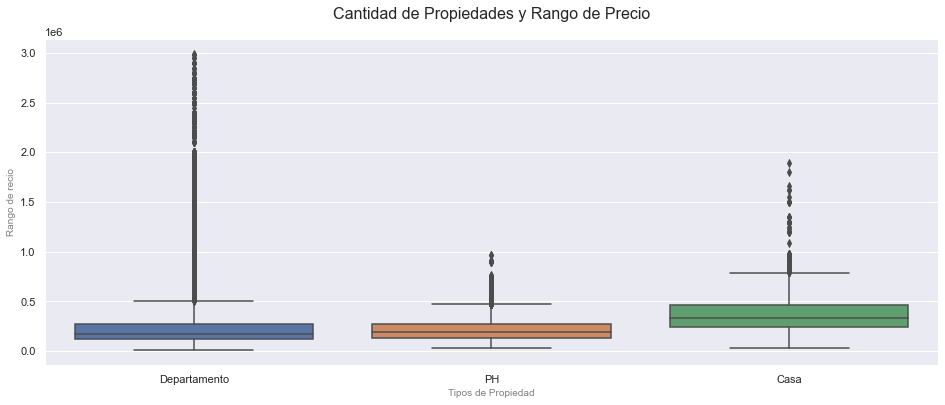

In [34]:
# Realizo cun boxplot que muestra los 3 tipos de Propiedad y su rango de precios

plt.figure(figsize=(16,6))

sns.boxplot(data = mask_sin_outliers, x = 'property_type', y = "price")

plt.title('Cantidad de Propiedades y Rango de Precio', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Rango de recio', size = 10, color='gray')

- Se observa que las Casas tienden a ser mas caras que los Departamentos y PH.

<Figure size 1152x1152 with 0 Axes>

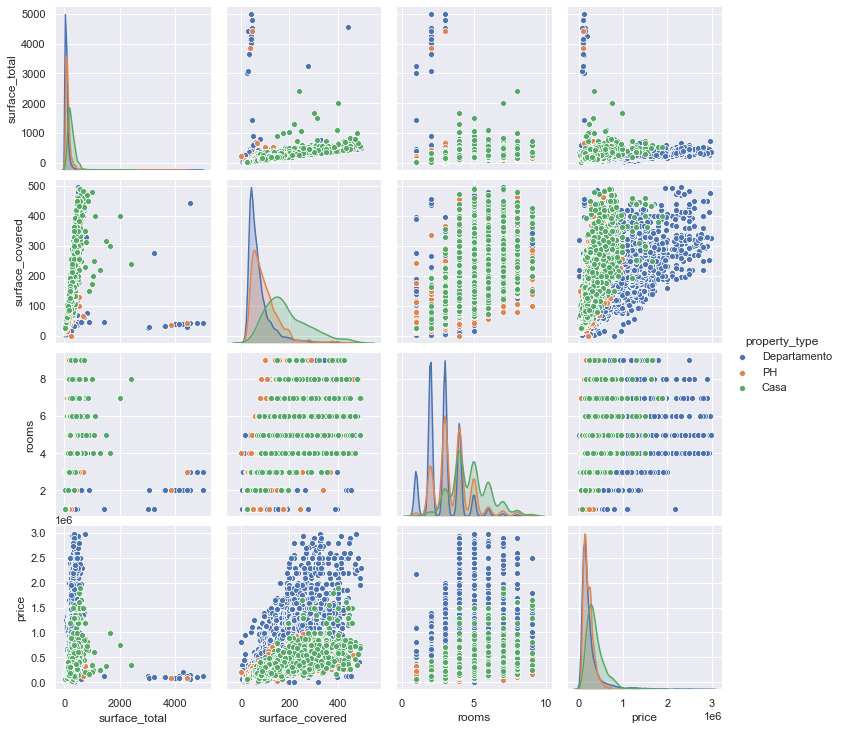

In [35]:
# Pairplot para visualizar todas las correlaciones del Dataset filtrado.

plt.figure(figsize=(16,16))
sns.pairplot(data = mask_sin_outliers, hue = 'property_type')

- A modo de conclusion del **EDA** (Exploratory Data Analysis), solo profundice en las correlacciones que creo que son relevantes para el tipo de Data que estamos trabajando. Por ejemplo, creo que no hace falta profundizar en la relacion entre los baños y la superficie total porque son variables que arquitectonicamente no tienen nada correlacionable. De igual modo cabe aclarar que sigue siendo la etapa mas importante de la Ciencia de Datos ya que la preparación de datos se puede tratar como otro hiperparámetro para ajustar como si fuera la parte de una tubería que alimenta el modelado (Machine Learning) 

### 2.1 Desafío 

- Como desafio me propongo a responder lo siguiente, hipoteticamente un cliente quiere comprar una casa y a partir del Dataset de Properati, obtener cual es el barrio con mas casas disponibles, ordenar dichos barrios por valor y al final usar el modelo de ML para predecir el precio aproximado.

Datos de la propiedad requerida:

- 300000 a 350000 usd
- terrerno 500m2
- cubierto 150m2
- 5 ambientes (3 cuartos 2 baños)
- barrio a definir


In [36]:
# Creo un nuevo frame

barrios = df_cf.loc[:,('l2','l3','rooms','surface_total','price', 'currency','property_type')]

In [37]:
# Creo una mascara para filtrar casas en Capital Federal

casas = (barrios.property_type.isin(['Casa'])) & (barrios.l2 == 'Capital Federal')

barrios = barrios[casas]
barrios.head(2)

,l2,l3,rooms,surface_total,price,currency,property_type
336,Capital Federal,San Cristobal,3.0,116.0,290000.0,USD,Casa
384,Capital Federal,Mataderos,3.0,171.0,179900.0,USD,Casa


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 <a list of 52 Text major ticklabel objects>)

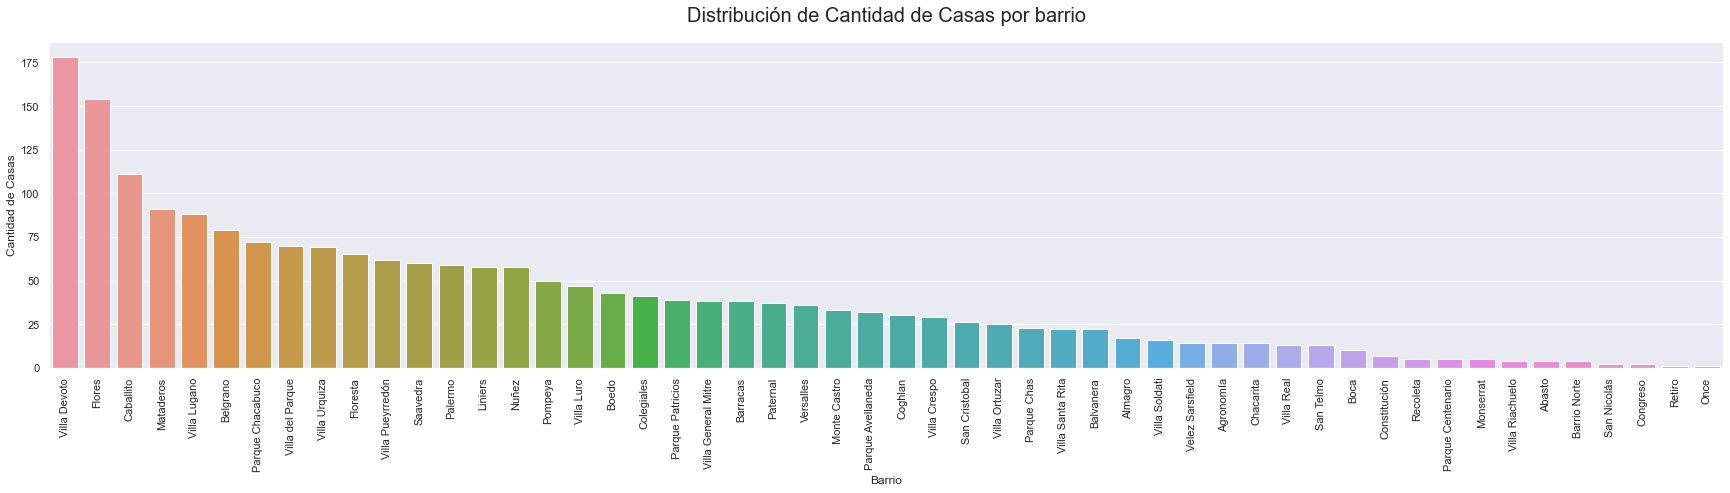

In [38]:
# Grafico para visualizar

plt.figure(figsize=(30,6))
plt.title('Distribución de Cantidad de Casas por barrio', weight=10, size = 20, pad = 20)
sns.countplot(data = barrios, x = "l3",order = barrios['l3'].value_counts().index)

plt.xlabel('Barrio')
plt.ylabel('Cantidad de Casas')
plt.xticks(rotation = 90)

- El grafico anterior nos muestra los barrios con mas **Casas Disponibles**.

In [39]:
barrios.head(2)

,l2,l3,rooms,surface_total,price,currency,property_type
336,Capital Federal,San Cristobal,3.0,116.0,290000.0,USD,Casa
384,Capital Federal,Mataderos,3.0,171.0,179900.0,USD,Casa


In [40]:
# Agrego el precio promedio por m2 al Dataframe

barrios_mprice = pd.DataFrame(barrios.groupby('l3').mean().price)
barrios_msup = pd.DataFrame(barrios.groupby('l3').mean().surface_total)


In [41]:
# Lo uno a mi Dataframe

barrios_m = barrios_mprice.join(barrios_msup.surface_total)

In [42]:
# A agrego una columna nueva con el promedio de m2 de Casas por barrio

barrios_m['precio_m2_promedio'] = barrios_m.price/barrios_m.surface_total
barrios_m.head(2)

,price,surface_total,precio_m2_promedio
l3,,,
Abasto,518250.0,350.0,1480.714286
Agronomía,474428.5,365.0,1299.804110


In [43]:
barrios = barrios_m.reset_index()

In [44]:
barrios.dropna(inplace=True)
barrios.head(5)

,l3,price,surface_total,precio_m2_promedio
0,Abasto,518250.000000,350.000000,1480.714286
1,Agronomía,474428.500000,365.000000,1299.804110
2,Almagro,317294.117647,194.470588,1631.578947
3,Balvanera,370772.727273,225.772727,1642.238776
4,Barracas,333828.921053,270.921053,1232.200000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 <a list of 52 Text major ticklabel objects>)

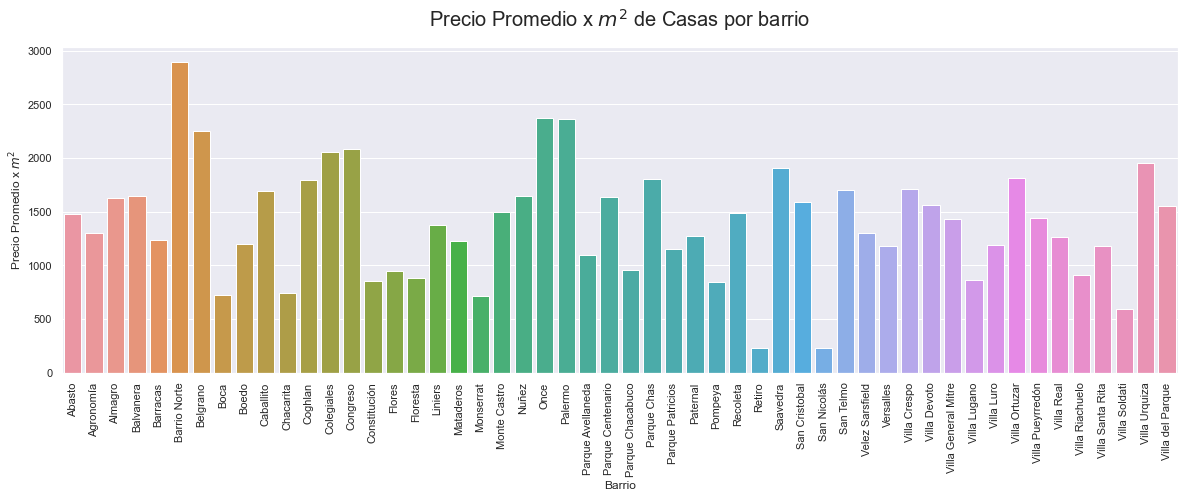

In [45]:
plt.figure(figsize=(20,6))
plt.title('Precio Promedio x $m^{2}$ de Casas por barrio', weight=10, size = 20, pad = 20)

sns.barplot(data= barrios,x= "l3", y="precio_m2_promedio") #,order = barrios['l3'].value_counts().index
plt.xlabel('Barrio')
plt.ylabel('Precio Promedio x $m^{2}$')
plt.xticks(rotation = 90)

- Con el anterior grafico podemos vizualizar el precio medio de cada barrio y compararlo con el resto.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [46]:
# 1) Selecciono aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.

new = data

new = new[(new['l2'] == 'Capital Federal') & (new['property_type'].isin(['Departamento', 'PH', 'Casa']))]
new.shape

(91485, 19)

In [47]:
#2) A partir de la primer mascara, creo una segunda Mascara que contempla aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2

new = new[(new['surface_total'] <= 1000) & (new['surface_total'] >= 15)]
new.shape

(82405, 19)

In [48]:
# 3) Selecciona aquellas propiedades cuya precio es menor 4000000 dólares

new = new[new['price'] <= 4000000]
new.shape

(82373, 19)

In [49]:
# 4) Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price. 

new = new[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
new.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [50]:
# 5) Descarto aquellas instacias con valores faltantes.

new = new.dropna()

df_ml = new
df_ml.shape

(81019, 6)

- Observo que **llego al Checkpoint (81019 rows × 6 columns)**: deberías obtener un dataset con **81019 instacias y 6 columnas**

In [51]:
df_ml.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


In [52]:
df_ml.corr(method = 'spearman').style.background_gradient(cmap='coolwarm')

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.965819,0.623882,0.842118,0.871035,0.695658
bedrooms,0.965819,1.000000,0.619075,0.822042,0.852421,0.675114
bathrooms,0.623882,0.619075,1.000000,0.688353,0.703215,0.698555
surface_total,0.842118,0.822042,0.688353,1.000000,0.958826,0.838976
surface_covered,0.871035,0.852421,0.703215,0.958826,1.000000,0.839475
price,0.695658,0.675114,0.698555,0.838976,0.839475,1.000000


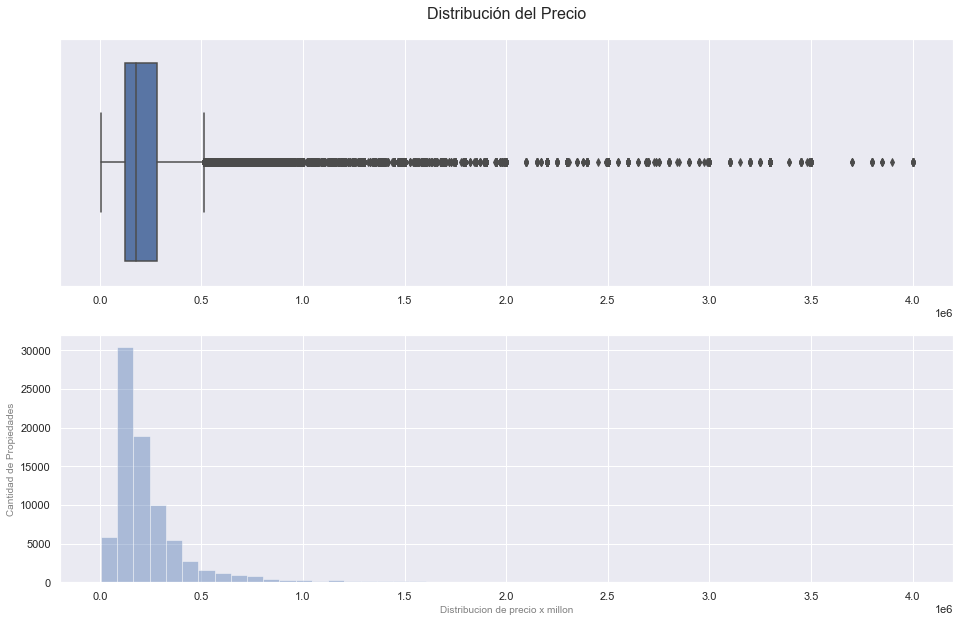

In [53]:
# Distribucion de los precios con el Dataset filtrado

plt.figure(figsize = (16,10))

plt.subplot(2,1,1)
sns.boxplot(df_ml['price'])
plt.xlabel("")
plt.title('Distribución del Precio', weight=10, size = 16, pad = 20)

plt.subplot(2,1,2)
sns.distplot(df_ml['price'],bins=50, kde = False)
plt.xlabel('Distribucion de precio x millon', size = 10, color='gray')
plt.ylabel('Cantidad de Propiedades', size = 10, color='gray')
plt.show()

- A partir del Dataset filtrado, corroboro que la mayoria de las propiedades posee precios entre 0 y 500000 usd y sin Outliers va a ser mas facil para el Modelo.

### - Modelo de Machine Learning 1 - Tomas de Anchorena



In [54]:
# Importo Librerias a usar

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix   #solo para clasificacion

df_ml.shape

(81019, 6)

- Como metrica para evaluar los modelos usare **Root mean square error (RMSE)** porque aunque  es sensible a los valores atípicos, nosotros ya los filtramos en el ejercicio anterior. Decido usarlo ya que podremos comparar el valor directamente con la variable a predecir, lo cual me daria dar cuenta como esta entrenado el modelo.

#### Arranco con un modelo de **Regresion Lineal como modelo Benchmark** 

In [55]:
# Defino X e y

X = df_ml.drop('price', axis = 1)
y = df_ml.price

# Divido el Dataset en entrenamiento (Train) y prueba (Test)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


In [56]:
# Defino el Modelo de Regresion Lineal

linear_model = LinearRegression()

In [57]:
# Entreno el modelo

linear_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# ver coeficientes (pendiente) intercept (ordenada al origen)

print(linear_model.coef_, linear_model.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] -56646.24807939719


In [59]:
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

In [60]:

rmse_linear_train = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

print(f'Raíz del error cuadrático medio en Regresión Lineal - Train: {rmse_linear_train}')
print(f'Raíz del error cuadrático medio en Regresión Lineal - Test: {rmse_linear_test}')

Raíz del error cuadrático medio en Regresión Lineal - Train: 199173.83253528475
Raíz del error cuadrático medio en Regresión Lineal - Test: 202449.36540361587


- Observo que el modelo NO tiene una presicion aceptable ya que el ERROR MEDIO del modelo de Regresion Lineal varia alrededor de  **200000 mil usd**. 

Feature: 0, Score: 11619.29813
Feature: 1, Score: -62943.55759
Feature: 2, Score: 132759.23462
Feature: 3, Score: 2054.27168
Feature: 4, Score: 107.00457


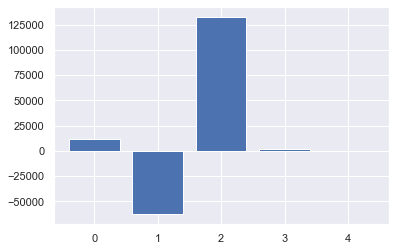

In [61]:
from sklearn.datasets import make_regression

# Creo la variable importance
importance = linear_model.coef_

# Funcion
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- Como complemento agrego la funcion .coef_ que muestra cual Feature es la que mas importancia tiene sobre el resto a la hora de predecir. La cual en una futura instancia a la hora de ajustar los hiperparametros me puede servir.



#### Sigo con un modelo **Decision Tree**

In [62]:
# Defino listas vacias para los valores de rmse a obtener
lista_rmse_dt_train = []
lista_rmse_dt_test = []

# Defin0 la lista de valores de max_depth a explorar para obtener el de mejor rendimiento

max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,28,29,30,31,32,35,40]

# Genero un loop sobre los distintos valores de max_depth 
for max_depth in max_depths:
    
    # Defino el modelo con el valor de vecinos deseado
    dtree_regressor = DecisionTreeRegressor(max_depth = max_depth, random_state=42) #stratify
    
    # Entrenar el modelo
    dtree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_dt = dtree_regressor.predict(X_train)
    rmse_dt_train = mean_squared_error(y_train, y_train_pred_dt,squared=False)

    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_dt = dtree_regressor.predict(X_test)
    rmse_dt_test = mean_squared_error(y_test, y_test_pred_dt,squared=False)
    
    # Agregar la información a las listas
    lista_rmse_dt_train.append(rmse_dt_train)
    lista_rmse_dt_test.append(rmse_dt_test)

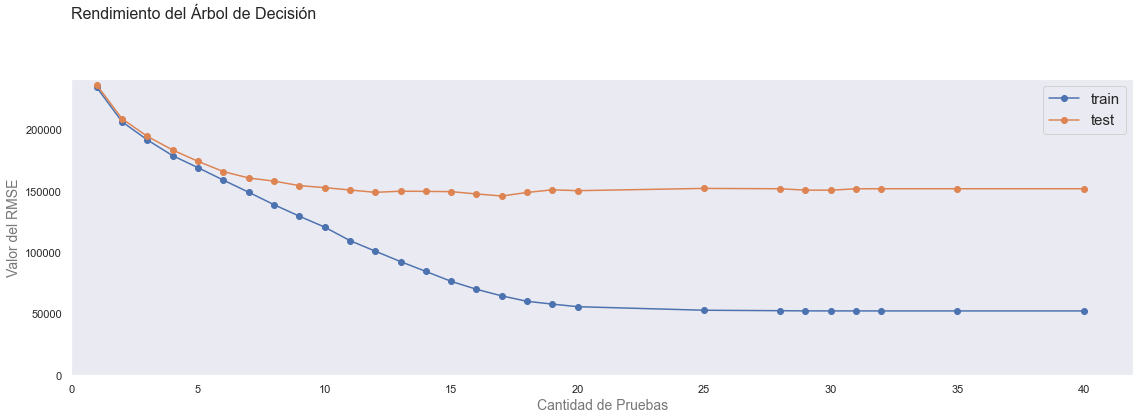

In [63]:
plt.figure(figsize=(16,6))
plt.title('Rendimiento del Árbol de Decisión', size = 16, weight=300, pad = 60, loc = 'left')

plt.plot(max_depths, lista_rmse_dt_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_dt_test,'o-',label='test')

plt.legend(fontsize = 15)
plt.xlabel('Cantidad de Pruebas', size = 14, color='#777777')
plt.ylabel('Valor del RMSE', size = 14, color='#777777')
plt.ylim(0,max(lista_rmse_dt_test) + 5000)
plt.xlim(0)
plt.tight_layout()
plt.grid()

plt.show()

In [64]:
print(f'Raíz del error cuadrático medio en Train: {lista_rmse_dt_train[11]}')
print(f'Raíz del error cuadrático medio en Test: {lista_rmse_dt_test[11]}')


Raíz del error cuadrático medio en Train: 101186.65188945616
Raíz del error cuadrático medio en Test: 149098.59329962902


- De acuerdo al grafico observo que la mejor **depth** para obtener la RMSE mas ajustada en este arbol seria 11. La media del error en el precio es de **149000 usd** aprox por lo tanto tambien hace falta seguir ajustando para mejorar el modelo.

Como complemento agrego la funcion .feature_importance_ que muestra cual Feature es la que mas importancia tiene sobre el resto a la hora de predecir. La cual en una futura instancia a la hora de ajustar los hiperparametros me puede servir.



Feature: 0, Score: 0.04714
Feature: 1, Score: 0.05343
Feature: 2, Score: 0.08183
Feature: 3, Score: 0.15979
Feature: 4, Score: 0.65780


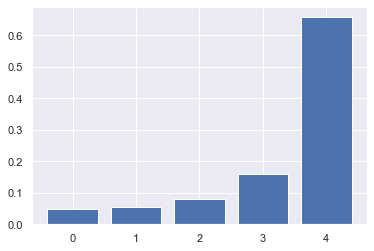

In [65]:
# Creo la variable importance
importance = dtree_regressor.feature_importances_

# Funcion
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


- La feature 4 hace referencia a surface_covered

#### Sigo con un modelo **K Nearest neighbors** para corroborar su performance y luego elegir el mejor

In [66]:
# Defino listas vacias para los valores de rmse a obtener
lista_rmse_knn_train = []
lista_rmse_knn_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Defino el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_knn = knn_regressor.predict(X_train) 
    rmse_knn_train = mean_squared_error(y_train, y_train_pred_knn, squared=False)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_knn = knn_regressor.predict(X_test)
    rmse_knn_test = mean_squared_error(y_test, y_test_pred_knn, squared=False)
    
    # Agregar la información a las listas
    lista_rmse_knn_train.append(rmse_knn_train)
    lista_rmse_knn_test.append(rmse_knn_test)


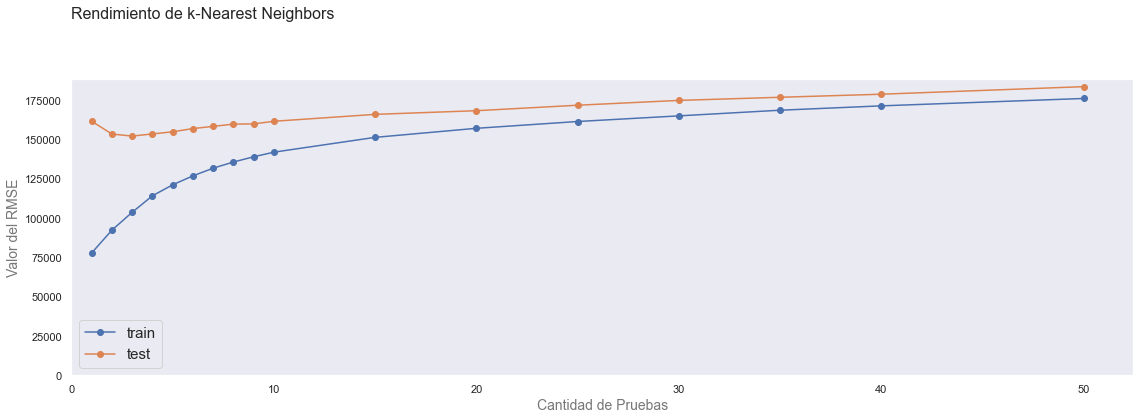

In [67]:
plt.figure(figsize=(16,6))
plt.title('Rendimiento de k-Nearest Neighbors', size = 16, weight=300, pad = 60, loc = 'left')

plt.plot(k_vecinos, lista_rmse_knn_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_knn_test,'o-',label='test')

plt.legend(fontsize = 15)
plt.xlabel('Cantidad de Pruebas', size = 14, color='#777777')
plt.ylabel('Valor del RMSE', size = 14, color='#777777')
plt.ylim(0,max(lista_rmse_knn_test) + 5000)
plt.xlim(0)
plt.tight_layout()
plt.grid()

plt.show()

In [68]:
print(f'Raíz del error cuadrático medio en Train: {lista_rmse_knn_train[2]}')
print(f'Raíz del error cuadrático medio en Test: {lista_rmse_knn_test[2]}')

Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


- Observo que el mejor rendimiento del modelo KNN es con **3 vecinos**. El error mas bajo da **152000 usd** 

- Tras observar los valores de RMSE obtenidos de los tres modelos con los hiperparámetros optimizados, puedo corroborar que el error sigue siendo demasiado grande para aceptar el modelo coo fidedigno. De igual modo, para este Dataset el modelo que elegiia es el **Decision Tree** ya que obtuvo el menor RMSE en el test, es decir, tiene menos error.

#### Para finalizar mi desafio, pongo a prueba los modelos. Supongamos que el cliente quiere una casa de 150 m2, 5 ambientes, 3 cuartos, 2 baños en el barrio de Chacarita. Voy a predecir su valor a partir de los 3 modelos para darle al cliente una respuesta aproximada.

In [69]:
df_ml.head(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0


In [70]:
x_new = df_ml.iloc[0:1]

x_new

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0


In [71]:
x_new = x_new.drop(['price'], axis = 1) 

In [72]:
#Cambio Valores

x_new.at[0,'bedrooms']= 5
x_new.at[0,'surface_total']= 500

x_new.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,5.0,2.0,500.0,140.0


In [73]:
# Predigo el precio de la hipotetica Casa

print(f'El precio predicho por el Regresor Lineal es de: {linear_model.predict(x_new)}')
print(f'El precio predicho por el Decision Tree es de: {dtree_regressor.predict(x_new)}')
print(f'El precio predicho por el K Nearest Neighbors es de: {knn_regressor.predict(x_new)}')


El precio predicho por el Regresor Lineal es de: [1017605.9978775]
El precio predicho por el Decision Tree es de: [420000.]
El precio predicho por el K Nearest Neighbors es de: [709920.]


In [74]:
# Como IDEA para investigar, creo una nueva Clase para agrupar los valores de las nuevas propiedades a predecir, pero no logro vincularla con el Dataset

class Casa:
    def __init__(self, rooms, bedrooms, bathrooms, surface_total, surface_covered, price):
        self.ambientes = rooms
        self.cuartos = bedrooms
        self.banios = bathrooms
        self.surface_total = surface_total
        self.surface_covered = surface_covered
        self.precio = price
        if surface_covered < surface_total:
            self.surface_covered = self.surface_covered
        else:
            print("El valor de superficie cubierta ingresado es inconsistente")
            self.surface_covered = self.surface_total

-   A modo de conclusion puedo afirmar que para que los modelos funcionen y predigan con mayor precision el precio de una propiedad hacen falta mas y mejores parametros, como por ejemplo: estado de la propiedad, piso y orientacion (departamento), cercania con transportes, etc. Tambien saber si la operacion se realizo por ese monto o no, para poder corroborar esos valores.

    De igual modo esos datos "clave" creo que se encuentran en la columna title del Dataset que se podria desarrollar por medio de reconociemiento de Lenguaje Natural que tengo entendido se vera en otro Bloque.